# Project: Wrangling and Analyzing WeRateDogs Data

## Introduction
This project involves gathering, assessing, cleaning and analyzing data about dog ratings from the popular Twitter account, [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). The original data used is from three separate datasets. The first dataset has archived tweets (with information such as the source, dog name, rating, and dog stage), the second dataset has predictions of dog breed based on the images while the third has information about the number of likes and retweets.

After assessing and cleaning the data, the analysis will explore questions such as which dog stage or breed is popular in the WeRateDogs data?; what is the most common source of dog rating tweets?; which year had the highest number of dog rating retweets?; and so on.

## Data Gathering

1. Load the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [18]:
import pandas as pd
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Download the tweet image prediction (image_predictions.tsv) data file using the Requests library

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
data = response.content

# Save the tsv file
with open('image_predictions.tsv', 'wb') as writer:
    writer.write(data)

In [5]:
# Load the image predictions data
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

3. Querying additional data via the Twitter API (tweet_json.txt) using the Tweepy library

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Get additional information for each tweet from the Twitter API and save JSON in a text file
# The keys are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Get the tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

# The loop below may take some minutes to run because of Twitter's rate limit
# So will track the time it takes
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

end = timer()
print(end - start)
print(fails_dict)

In [19]:
import json

# Create the dataframe for tweet counts from the JSON file
tweet_list = []

with open('tweet_json.txt') as file:
    for line in file:
        tweet_dict = json.loads(line)
        tweet_list.append({'tweet_id': tweet_dict['id'],
                        'retweet_count': tweet_dict['retweet_count'],
                        'favorite_count': tweet_dict['favorite_count']
                       })

tweet_counts_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

### Visual Assessment

In [7]:
# Increase the display column width so that all the content of a column is visible
pd.set_option('display.max_colwidth', 600)

In [6]:
# View the twitter archive data
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# View the image predictions data
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
# View the tweet counts data
tweet_counts_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessement

#### Twitter Archive DataFrame

In [9]:
# Get information about the data in the twitter archive dataframe 
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Check for duplicates in the twitter archive dataframe
twitter_archive_df.duplicated().sum()

0

In [11]:
# Check the different rating numerator values in the dataset
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# Check the different rating denominator values in the dataset
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Image Predictions DataFrame

In [15]:
# Get information about the data in the image predictions dataframe 
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Check for duplicates in the image predictions dataset
image_predictions_df.duplicated().sum()

0

#### Tweet Counts DataFrame

In [16]:
# Get information about the data in the tweet counts dataframe
tweet_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
# Check for duplicates in the tweet counts dataframe
tweet_counts_df.duplicated().sum()

0

### Quality issues
1. The twitter archive dataframe has replies

2. The twitter archive dataframe has retweets

3. The tweet source in the twitter archive dataframe is embedded in html tag

4. The timestamp column in the twitter archive dataframe is in the wrong data type

5. The rating numerator in the twitter archive dataframe is embedded in text

6. The rating denominator in the twitter archive dataframe is embedded in text

7. The rating denominator column has values that are less than or greater than 10

8. The rating numerator column has values that are less than 10

9. Some of the predictions in the image predictions dataframe are not for dogs

### Tidiness issues
1. One variable in four columns (doggo, floofer, pupper and puppo) in the twitter archive dataframe

2. Retweet count and favorite count from the tweet counts dataframe should be part of the twitter archive dataframe

3. The image predictions dataframe has multiple columns with predictions of the dog breed

## Cleaning Data

### Resources Used
* [Pandas Transform](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)
* [When to use Pandas transform() function](https://towardsdatascience.com/when-to-use-pandas-transform-function-df8861aa0dcf)

In [19]:
# Import the necessary libraries
import numpy as np
from bs4 import BeautifulSoup

In [20]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_counts_clean = tweet_counts_df.copy()

## Tidiness

#### Issue #1: One variable in four columns (doggo, floofer, pupper and puppo) in the twitter archive dataframe

#### Define:
Collapse the columns `doggo`, `floofer`, `pupper` and `puppo` into one column that holds the dog stage variable.

#### Code

In [21]:
variables = ['doggo', 'floofer', 'pupper', 'puppo']

# Using pandas' melt() function to create the column with dog stages
twitter_archive_dog_stages = pd.melt(twitter_archive_clean, id_vars='tweet_id',
                                   value_vars=variables, value_name='dog_stage')

In [22]:
# Drop the "variable" column
twitter_archive_dog_stages.drop(columns='variable', inplace=True)

# Replace 'None' with np.NaN
twitter_archive_dog_stages.replace('None', np.NaN, inplace=True)

# Drop duplicate variables
twitter_archive_dog_stages.drop_duplicates(inplace=True)

In [23]:
# Combine rows that have more than one dog stage
combined_dog_stages = twitter_archive_dog_stages[twitter_archive_dog_stages.dog_stage.notna()].groupby('tweet_id').transform(lambda x: ', '.join(x))

twitter_archive_dog_stages.loc[combined_dog_stages.index, 'dog_stage'] = combined_dog_stages.values

In [24]:
# Drop duplicates by the tweet_id column
twitter_archive_dog_stages.sort_values(by='dog_stage', inplace=True)
twitter_archive_dog_stages.drop_duplicates(subset='tweet_id', inplace=True)

In [25]:
# Merge the twitter dog stages dataframe to the twitter archive dataframe
twitter_archive_clean = twitter_archive_clean.merge(twitter_archive_dog_stages, on='tweet_id')

In [26]:
# Drop the 'doggo', 'floofer', 'pupper', 'puppo' columns from the twitter archive dataframe
twitter_archive_clean.drop(columns=variables, inplace=True)

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


#### Issue #2: Retweet count and favorite count from the tweet counts dataframe should be part of the twitter archive dataframe

#### Define
Merge the tweet counts and twitter archive dataframes so that the `retweet_count` and `favorite_count` columns are part of the twitter archive dataframe

#### Code

In [28]:
combined_twitter_archive_clean = twitter_archive_clean.merge(tweet_counts_clean, on='tweet_id')

#### Test

In [29]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
dog_stage                     379 non-null object
retweet_count                 2354 non-null int64
favorite_count                2354 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 312.6+ KB


#### Issue #3: The image predictions dataframe has multiple columns with predictions of the dog breed

#### Define
Create a column in the image predictions dataframe that has the predicted dog breed from either the p1, p2 and p3 predictions

#### Code

In [30]:
breed_list = []

# By using the indices, loop through the image predictions and add
# the prediction to the breed list if the prediction is a dog breed

for i in image_predictions_clean.index:
    if image_predictions_clean.at[i, 'p1_dog']:
        breed_list.append(image_predictions_clean.at[i, 'p1'])
    elif image_predictions_clean.at[i, 'p2_dog']:
        breed_list.append(image_predictions_clean.at[i, 'p2'])
    elif image_predictions_clean.at[i, 'p3_dog']:
        breed_list.append(image_predictions_clean.at[i, 'p3'])
    else:
        breed_list.append(np.NaN)

# create the breed column
image_predictions_clean.loc[:, 'breed'] = breed_list

#### Test

In [31]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
breed       1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


## Quality

#### Issue #1: The twitter archive dataframe has replies

#### Define:
Drop rows that are replies since they are not needed for the analysis

#### Code

In [32]:
# Drop the rows with replies
combined_twitter_archive_clean.drop(combined_twitter_archive_clean[pd.notna(combined_twitter_archive_clean.in_reply_to_user_id)].index, inplace=True)

In [33]:
# Drop the redundant replies columns
combined_twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

#### Test

In [34]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2353
Data columns (total 14 columns):
tweet_id                      2276 non-null int64
timestamp                     2276 non-null object
source                        2276 non-null object
text                          2276 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2272 non-null object
rating_numerator              2276 non-null int64
rating_denominator            2276 non-null int64
name                          2276 non-null object
dog_stage                     371 non-null object
retweet_count                 2276 non-null int64
favorite_count                2276 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 266.7+ KB


#### Issue #2: The twitter archive dataframe has retweets

#### Define
Drop rows that are retweets since they are not needed for the analysis

#### Code

In [36]:
# Drop the rows with retweets
combined_twitter_archive_clean.drop(combined_twitter_archive_clean[pd.notna(combined_twitter_archive_clean.retweeted_status_id)].index, inplace=True)

In [37]:
# Drop the redundant retweets columns
combined_twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [38]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: int64(5), object(6)
memory usage: 196.6+ KB


#### Issue #3: The tweet source in the twitter archive dataframe is embedded in html tag

#### Define
Extract the source from the html tags

#### Code

In [39]:
def extract_from_html(df_col, tag):
    extracted_list = []
    for element in df_col:
        soup = BeautifulSoup(element, 'lxml')
        extracted_list.append(soup.find(tag).contents[0])
    return extracted_list

In [40]:
combined_twitter_archive_clean.loc[:, 'extracted_source'] = extract_from_html(combined_twitter_archive_clean.source, 'a')

In [41]:
# Drop the original source column
combined_twitter_archive_clean.drop('source', axis=1, inplace=True)

#### Test

In [42]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
extracted_source      2097 non-null object
dtypes: int64(5), object(6)
memory usage: 196.6+ KB


#### Issue #4: The timestamp column in the twitter archive dataframe is in the wrong data type

#### Define
Change the data type of the timestamp column from string to datetime

#### Code

In [43]:
combined_twitter_archive_clean.timestamp = pd.to_datetime(combined_twitter_archive_clean.timestamp)

#### Test

In [44]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
extracted_source      2097 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 196.6+ KB


#### Issue #5: The rating numerator in the twitter archive dataframe is embedded in text

#### Define
Extract the rating numerator from the text in the `text` column

#### Code

In [45]:
combined_twitter_archive_clean['extracted_rating_numerator'] = combined_twitter_archive_clean.text.str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0].astype('float').astype('int64')

In [46]:
# Drop the original rating numerator column
combined_twitter_archive_clean.drop(columns='rating_numerator', inplace=True)

#### Test

In [47]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
text                          2097 non-null object
expanded_urls                 2094 non-null object
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     336 non-null object
retweet_count                 2097 non-null int64
favorite_count                2097 non-null int64
extracted_source              2097 non-null object
extracted_rating_numerator    2097 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 196.6+ KB


#### Issue #6: The rating denominator in the twitter archive dataframe is embedded in text

#### Define
Extract the rating denominator from the text in the `text` column

#### Code

In [48]:
combined_twitter_archive_clean['extracted_rating_denominator'] = combined_twitter_archive_clean.text.str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[1].astype('float').astype('int64')

In [49]:
# Drop the original rating denominator column
combined_twitter_archive_clean.drop(columns='rating_denominator', inplace=True)

#### Test

In [50]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id                        2097 non-null int64
timestamp                       2097 non-null datetime64[ns]
text                            2097 non-null object
expanded_urls                   2094 non-null object
name                            2097 non-null object
dog_stage                       336 non-null object
retweet_count                   2097 non-null int64
favorite_count                  2097 non-null int64
extracted_source                2097 non-null object
extracted_rating_numerator      2097 non-null int64
extracted_rating_denominator    2097 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 196.6+ KB


#### Issue #7: The rating denominator column has values that are less than or greater than 10

#### Define
Drop tweets with a rating denominator that is below or above 10 since the [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) ratings almost always have a denominator of 10.

#### Code

In [51]:
combined_twitter_archive_clean.drop(combined_twitter_archive_clean.query('extracted_rating_denominator < 10 | extracted_rating_denominator > 10').index, inplace=True)

#### Test

In [52]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id                        2080 non-null int64
timestamp                       2080 non-null datetime64[ns]
text                            2080 non-null object
expanded_urls                   2077 non-null object
name                            2080 non-null object
dog_stage                       336 non-null object
retweet_count                   2080 non-null int64
favorite_count                  2080 non-null int64
extracted_source                2080 non-null object
extracted_rating_numerator      2080 non-null int64
extracted_rating_denominator    2080 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 195.0+ KB


#### Issue #8: The rating numerator column has values that are less than 10

#### Define
Drop tweets with a rating numerator that is less than 10 because the [numerators are almost always greater than 10](http://knowyourmeme.com/memes/theyre-good-dogs-brent), which makes the values that are less than 10 unusual.

#### Code

In [53]:
combined_twitter_archive_clean.drop(combined_twitter_archive_clean.query('extracted_rating_numerator < 10').index, inplace=True)

#### Test

In [54]:
combined_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 2348
Data columns (total 11 columns):
tweet_id                        1665 non-null int64
timestamp                       1665 non-null datetime64[ns]
text                            1665 non-null object
expanded_urls                   1662 non-null object
name                            1665 non-null object
dog_stage                       292 non-null object
retweet_count                   1665 non-null int64
favorite_count                  1665 non-null int64
extracted_source                1665 non-null object
extracted_rating_numerator      1665 non-null int64
extracted_rating_denominator    1665 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 156.1+ KB


#### Issue #9: Some of the predictions in the image predictions dataframe are not for dogs

#### Define
Drop rows in the image predictions dataframe that do not have image predictions for dogs.

#### Code

In [55]:
# Drop rows where all the three predictions are not for dogs
image_predictions_clean.drop(image_predictions_clean.query('p1_dog != True & p2_dog != True & p3_dog != True').index, inplace=True)

#### Test

In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
breed       1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 155.6+ KB


## Storing Data
Save the gathered, assessed, and cleaned master dataset to a CSV file

In [57]:
# Merge the combined twitter archive and the image predictions dataframes
twitter_archive_master = combined_twitter_archive_clean.merge(image_predictions_clean, on='tweet_id')

In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1375
Data columns (total 23 columns):
tweet_id                        1376 non-null int64
timestamp                       1376 non-null datetime64[ns]
text                            1376 non-null object
expanded_urls                   1376 non-null object
name                            1376 non-null object
dog_stage                       229 non-null object
retweet_count                   1376 non-null int64
favorite_count                  1376 non-null int64
extracted_source                1376 non-null object
extracted_rating_numerator      1376 non-null int64
extracted_rating_denominator    1376 non-null int64
jpg_url                         1376 non-null object
img_num                         1376 non-null int64
p1                              1376 non-null object
p1_conf                         1376 non-null float64
p1_dog                          1376 non-null bool
p2                              1376 non-null

In [59]:
# Save the dataframe to file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [60]:
# Import the necessary library
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 23 columns):
tweet_id                        1376 non-null int64
timestamp                       1376 non-null datetime64[ns]
text                            1376 non-null object
expanded_urls                   1376 non-null object
name                            1376 non-null object
dog_stage                       229 non-null object
retweet_count                   1376 non-null int64
favorite_count                  1376 non-null int64
extracted_source                1376 non-null object
extracted_rating_numerator      1376 non-null int64
extracted_rating_denominator    1376 non-null int64
jpg_url                         1376 non-null object
img_num                         1376 non-null int64
p1                              1376 non-null object
p1_conf                         1376 non-null float64
p1_dog                          1376 non-null bool
p2                              1376 non-null

### Insights:
Using the assessed and cleaned WeRateDogs data, the following are some of the interesting questions and findings from the data:

1. What are the top five popular dog breeds based on the average favorite count?

  * Based on the average favorite count, the most popular breed is the black-and-tan_coonhound with an average of 33911 likes followed by the Bedlington_terrier with a mean of 33445 likes. The other three breeds making up the top five include Saluki (24060), French_bulldog (23118) and Afghan_hound (22451).



2. What is the most common source of dog rating?

  * The most common source of dog rating tweets is "Twitter for iPhone", with 1354 tweets followed by "Twitter Web Client" with 14 tweets.


3. On average, how has the number of dog rating retweets changed from 2015 to 2017?

  * Between 2015 and 2017, the number of dog rating retweets increased by over 300%, from about 1379 retweets in 2015 to about 6031 retweets in 2017.



4. Which dog stage has the highest median rating?

  * The popular dog stages based on the median rating are doggo and puppo with median ratings of 13 and 12 between them.

### Visualizations

In [72]:
# Function for setting the title and axis labels for the charts
def set_plot_labels(plot_title, x_label, y_label, title_fontsize = 14, axis_fontsize = 13):
    plt.title(plot_title, fontsize=title_fontsize)
    plt.xlabel(x_label, fontsize=axis_fontsize)
    plt.ylabel(y_label, fontsize=axis_fontsize)

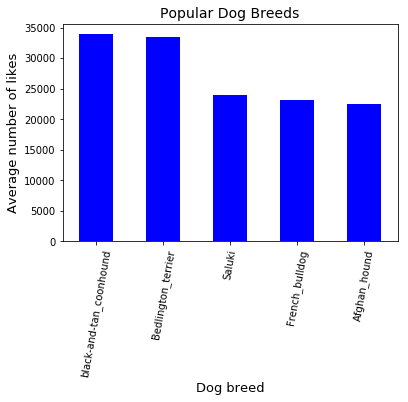

In [73]:
#1. What are the top five popular dog breeds based on the average favorite count?
df.groupby('breed').mean().favorite_count.sort_values(ascending=False).head(5).astype('int').plot(kind='bar', color='blue')
plt.xticks(rotation=80)
set_plot_labels('Popular Dog Breeds', 'Dog breed', 'Average number of likes');

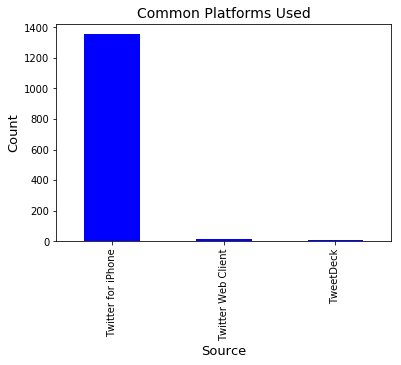

In [74]:
# 2. What is the most common source of dog rating?
df.extracted_source.value_counts().plot(kind='bar', color='blue')
set_plot_labels('Common Platforms Used', 'Source', 'Count');

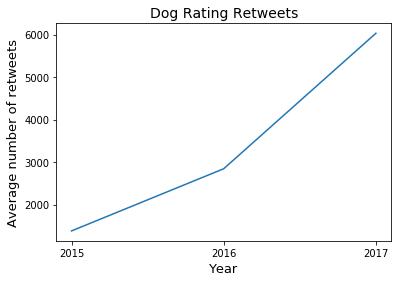

In [66]:
# 3. On average, how has the number of dog rating retweets changed from 2015 to 2017?
retweet_counts = df.groupby(df.timestamp.dt.year).mean().retweet_count
plt.plot(retweet_counts.index.astype('str'), retweet_counts.values)
set_plot_labels('Dog Rating Retweets', 'Year', 'Average number of retweets');

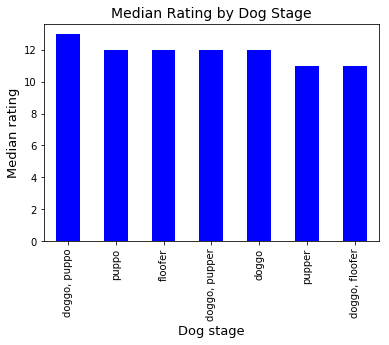

In [75]:
# 4. Which dog stage has the highest median rating?
df.groupby('dog_stage').median().extracted_rating_numerator.sort_values(ascending=False).plot(kind='bar', color='blue')

# Set the labels
set_plot_labels('Median Rating by Dog Stage', 'Dog stage', 'Median rating');